In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Part 1 Preprossing and EDA

In [2]:
data = pd.read_csv('Orders.csv')

In [3]:
data.head()

,Row.ID,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Postal.Code,City,...,Product.ID,Category,Sub.Category,Product.Name,Sales,Quantity,Discount,Profit,Shipping.Cost,Order.Priority
0,40098,CA-2014-AB10015140-41954,11/11/14,11/13/14,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,TEC-PH-5816,Technology,Phones,Samsung Convoy 3,$221.98,2,0.0,$62.15,40.77,High
1,26341,IN-2014-JR162107-41675,2/5/14,2/7/14,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,FUR-CH-5379,Furniture,Chairs,"Novimex Executive Leather Armchair, Black","$3,709.40",9,0.1,-$288.77,923.63,Critical
2,25330,IN-2014-CR127307-41929,10/17/14,10/18/14,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,...,TEC-PH-5356,Technology,Phones,"Nokia Smart Phone, with Caller ID","$5,175.17",9,0.1,$919.97,915.49,Medium
3,13524,ES-2014-KM1637548-41667,1/28/14,1/30/14,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,...,TEC-PH-5267,Technology,Phones,"Motorola Smart Phone, Cordless","$2,892.51",5,0.1,-$96.54,910.16,Medium
4,47221,SG-2014-RH9495111-41948,11/5/14,11/6/14,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,...,TEC-CO-6011,Technology,Copiers,"Sharp Wireless Fax, High-Speed","$2,832.96",8,0.0,$311.52,903.04,Critical


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb6f129dcd0>,
      dtype=object)

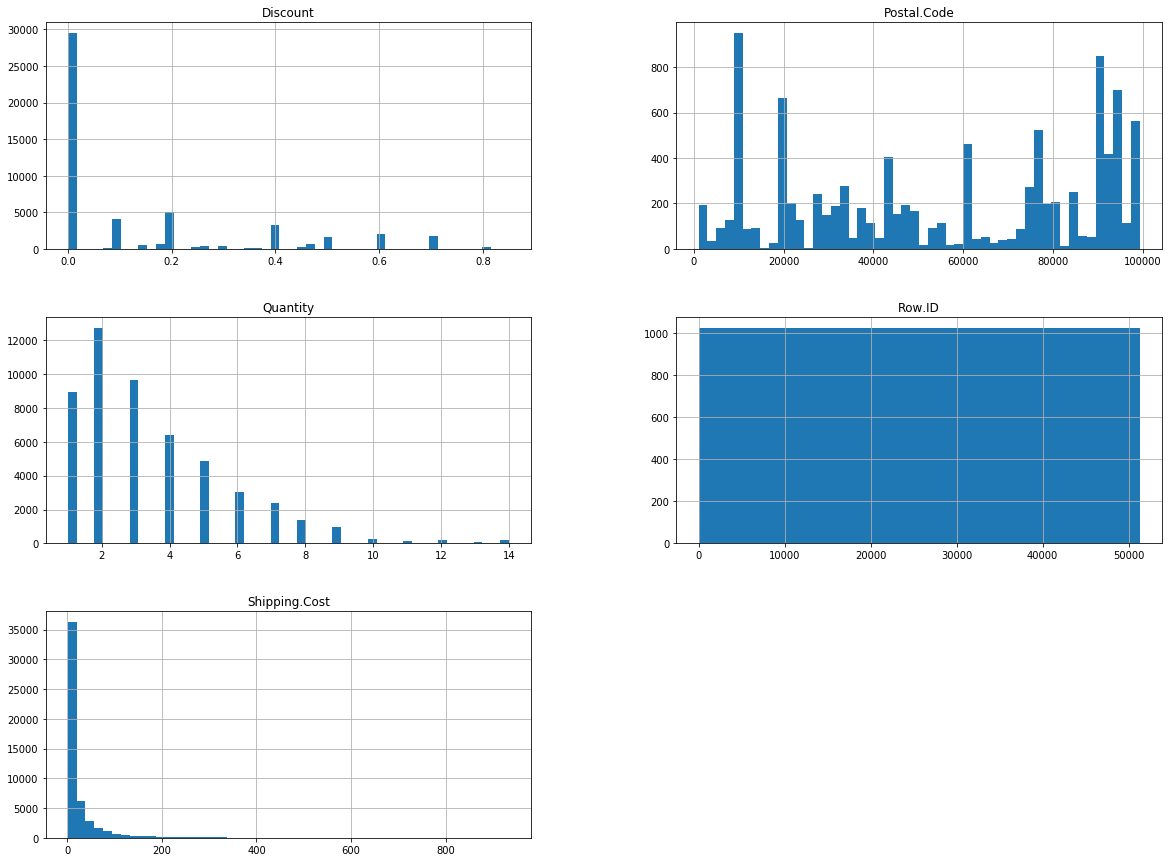

In [4]:
data.hist(bins=50, figsize=(20,15))

In [5]:
data.describe() # should change some other columns to numeric before like Profit

,Row.ID,Postal.Code,Quantity,Discount,Shipping.Cost
count,51290.00000,9994.000000,51290.000000,51290.000000,51290.000000
mean,25645.50000,55190.379428,3.476545,0.142908,26.478567
std,14806.29199,32063.693350,2.278766,0.212280,57.251373
min,1.00000,1040.000000,1.000000,0.000000,1.002000
25%,12823.25000,23223.000000,2.000000,0.000000,2.610000
50%,25645.50000,56430.500000,3.000000,0.000000,7.790000
75%,38467.75000,90008.000000,5.000000,0.200000,24.450000
max,51290.00000,99301.000000,14.000000,0.850000,933.570000


In [6]:
categorical = ['Ship.Mode', 'City', 'Category', 'Sub.Category', 'Order.Priority']

for feature in categorical:
    print(data[feature].value_counts())
    print('')

Standard Class    30775
Second Class      10309
First Class        7505
Same Day           2701
Name: Ship.Mode, dtype: int64

New York City    915
Los Angeles      747
Philadelphia     537
San Francisco    510
Santo Domingo    443
                ... 
Vigevano           1
Nagaoka            1
South Shields      1
Matsumoto          1
Girón              1
Name: City, Length: 3650, dtype: int64

Office Supplies    31289
Technology         10141
Furniture           9860
Name: Category, dtype: int64

Binders        6146
Storage        5049
Art            4864
Paper          3492
Chairs         3434
Phones         3357
Furnishings    3154
Accessories    3075
Fasteners      2601
Labels         2601
Bookcases      2411
Supplies       2407
Envelopes      2387
Copiers        2223
Appliances     1742
Machines       1486
Tables          861
Name: Sub.Category, dtype: int64

Medium      29433
High        15501
Critical     3932
Low          2424
Name: Order.Priority, dtype: int64



### Problem 1

In [7]:
data_clean = data.copy()

In [8]:
data_clean["Sales"] = pd.to_numeric(data['Sales'].str.replace('$', '').str.replace(',', ''))
data_clean['Profit'] = pd.to_numeric(data['Profit'].str.replace('$', '').str.replace(',', ''))

In [9]:
print(data_clean.Sales.dtypes)
print(data_clean.Profit.dtypes)

float64
float64


In [10]:
data_clean.dtypes

Row.ID              int64
Order.ID           object
Order.Date         object
Ship.Date          object
Ship.Mode          object
Customer.ID        object
Customer.Name      object
Segment            object
Postal.Code       float64
City               object
State              object
Country            object
Region             object
Market             object
Product.ID         object
Category           object
Sub.Category       object
Product.Name       object
Sales             float64
Quantity            int64
Discount          float64
Profit            float64
Shipping.Cost     float64
Order.Priority     object
dtype: object

In [11]:
data_clean.head(3)

,Row.ID,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Postal.Code,City,...,Product.ID,Category,Sub.Category,Product.Name,Sales,Quantity,Discount,Profit,Shipping.Cost,Order.Priority
0,40098,CA-2014-AB10015140-41954,11/11/14,11/13/14,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,TEC-PH-5816,Technology,Phones,Samsung Convoy 3,221.98,2,0.0,62.15,40.77,High
1,26341,IN-2014-JR162107-41675,2/5/14,2/7/14,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,FUR-CH-5379,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.40,9,0.1,-288.77,923.63,Critical
2,25330,IN-2014-CR127307-41929,10/17/14,10/18/14,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,...,TEC-PH-5356,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.17,9,0.1,919.97,915.49,Medium


### Problem 2.1

In [12]:
data_clean['Order.Date'] = pd.to_datetime(data_clean['Order.Date'])

In [13]:
data_clean['Year'] = pd.DatetimeIndex(data_clean['Order.Date']).year

In [14]:
pd.to_datetime(data_clean['Order.Date'])

0       2014-11-11
1       2014-02-05
2       2014-10-17
3       2014-01-28
4       2014-11-05
           ...    
51285   2015-06-19
51286   2014-05-06
51287   2012-08-26
51288   2013-02-17
51289   2013-05-22
Name: Order.Date, Length: 51290, dtype: datetime64[ns]

In [15]:
data_clean['Month'] =  pd.DatetimeIndex(data_clean['Order.Date']).month

In [16]:
data_grp = data_clean.groupby('Month').agg('sum')
data_grp = data_grp.reset_index()

In [17]:
data_grp.head()

,Month,Row.ID,Postal.Code,Sales,Quantity,Discount,Profit,Shipping.Cost,Year
0,1,71468915,21500486.0,676789.30,8872,365.122,73440.45,71225.18900,5258055
1,2,60085551,17761468.0,554650.21,7429,307.574,72932.18,59878.28000,4448403
2,3,79093205,36758872.0,760518.34,10390,432.354,91873.45,76723.92404,6055482
3,4,75926778,34498859.0,695978.86,10466,448.146,73822.57,75072.86600,6105764
4,5,98261611,40926610.0,915493.24,13196,543.822,106970.07,102015.17500,7626250


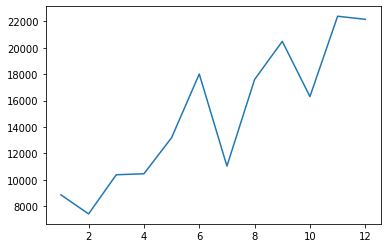

In [18]:
plt.plot(data_grp['Month'], data_grp['Quantity'])

#### Problem 2.2

In [19]:
data_clean.Category.unique()

array(['Technology', 'Furniture', 'Office Supplies'], dtype=object)

In [20]:
data_grp2 = data_clean.groupby(['Month','Category'], as_index=False).agg('sum')

In [21]:
data_grp2.head()

,Month,Category,Row.ID,Postal.Code,Sales,Quantity,Discount,Profit,Shipping.Cost,Year
0,1,Furniture,12689244,4614285.0,228829.15,1750,80.820,14224.86,23256.435,988772
1,1,Office Supplies,45191860,12903363.0,222428.77,5480,218.930,30885.57,23154.366,3254290
2,1,Technology,13587811,3982838.0,225531.38,1642,65.372,28330.02,24814.388,1014993
3,2,Furniture,11089801,4118202.0,190255.60,1494,66.590,18321.97,20880.321,853833
4,2,Office Supplies,36684342,9994734.0,157169.49,4340,175.950,22224.46,17927.632,2656169


In [22]:
tech = data_grp2.loc[data_grp2.Category=='Technology']
office = data_grp2.loc[data_grp2.Category=='Office Supplies']
furniture = data_grp2.loc[data_grp2.Category=='Furniture']

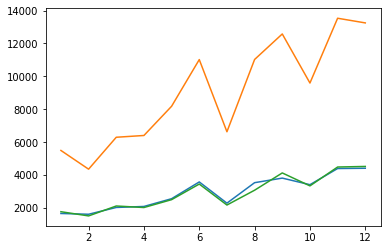

In [23]:
plt.plot(tech['Month'], tech['Quantity'])
plt.plot(office['Month'], office['Quantity'])
plt.plot(furniture['Month'], furniture['Quantity'])

### Problem 3.1

In [24]:
data_clean.head()

,Row.ID,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Postal.Code,City,...,Sub.Category,Product.Name,Sales,Quantity,Discount,Profit,Shipping.Cost,Order.Priority,Year,Month
0,40098,CA-2014-AB10015140-41954,2014-11-11,11/13/14,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,Phones,Samsung Convoy 3,221.98,2,0.0,62.15,40.77,High,2014,11
1,26341,IN-2014-JR162107-41675,2014-02-05,2/7/14,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,Chairs,"Novimex Executive Leather Armchair, Black",3709.40,9,0.1,-288.77,923.63,Critical,2014,2
2,25330,IN-2014-CR127307-41929,2014-10-17,10/18/14,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,...,Phones,"Nokia Smart Phone, with Caller ID",5175.17,9,0.1,919.97,915.49,Medium,2014,10
3,13524,ES-2014-KM1637548-41667,2014-01-28,1/30/14,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,...,Phones,"Motorola Smart Phone, Cordless",2892.51,5,0.1,-96.54,910.16,Medium,2014,1
4,47221,SG-2014-RH9495111-41948,2014-11-05,11/6/14,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,...,Copiers,"Sharp Wireless Fax, High-Speed",2832.96,8,0.0,311.52,903.04,Critical,2014,11


In [25]:
rdata = pd.read_csv('Returns.csv')

In [26]:
rdata.head()

,Returned,Order ID,Region
0,Yes,CA-2012-SA20830140-41210,Central US
1,Yes,IN-2012-PB19210127-41259,Eastern Asia
2,Yes,CA-2012-SC20095140-41174,Central US
3,Yes,IN-2015-JH158207-42140,Oceania
4,Yes,IN-2014-LC168857-41747,Oceania


In [27]:
mdf= pd.merge(data_clean, rdata, how='inner', left_on = 'Order.ID', right_on = 'Order ID')

In [28]:
mdf.head()

,Row.ID,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Postal.Code,City,...,Quantity,Discount,Profit,Shipping.Cost,Order.Priority,Year,Month,Returned,Order ID,Region_y
0,30191,IN-2012-PB19210127-41259,2012-12-16,12/19/12,First Class,PB-19210127,Phillip Breyer,Corporate,NaN,Taipei,...,2,0.0,720.36,725.57,Critical,2012,12,Yes,IN-2012-PB19210127-41259,Eastern Asia
1,30190,IN-2012-PB19210127-41259,2012-12-16,12/19/12,First Class,PB-19210127,Phillip Breyer,Corporate,NaN,Taipei,...,5,0.0,153.75,627.27,Critical,2012,12,Yes,IN-2012-PB19210127-41259,Eastern Asia
2,30187,IN-2012-PB19210127-41259,2012-12-16,12/19/12,First Class,PB-19210127,Phillip Breyer,Corporate,NaN,Taipei,...,3,0.0,311.85,458.97,Critical,2012,12,Yes,IN-2012-PB19210127-41259,Eastern Asia
3,30193,IN-2012-PB19210127-41259,2012-12-16,12/19/12,First Class,PB-19210127,Phillip Breyer,Corporate,NaN,Taipei,...,5,0.0,114.60,203.92,Critical,2012,12,Yes,IN-2012-PB19210127-41259,Eastern Asia
4,30189,IN-2012-PB19210127-41259,2012-12-16,12/19/12,First Class,PB-19210127,Phillip Breyer,Corporate,NaN,Taipei,...,3,0.0,68.22,25.48,Critical,2012,12,Yes,IN-2012-PB19210127-41259,Eastern Asia


In [29]:
mdf.Profit # some profits are negative. Need further inspection

0       720.36
1       153.75
2       311.85
3       114.60
4        68.22
         ...  
2215     17.34
2216      7.60
2217    -75.56
2218    -50.67
2219      9.03
Name: Profit, Length: 2220, dtype: float64

In [30]:
mdf.Returned.unique()

array(['Yes'], dtype=object)

In [31]:
mdf['Year'] = mdf['Year'].astype(str)


In [32]:
mdfg= mdf.groupby('Year', as_index=False).agg('sum')

<BarContainer object of 4 artists>

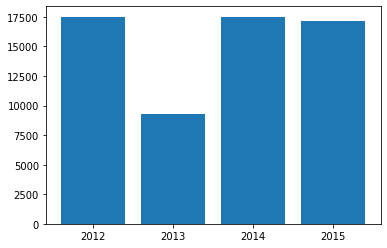

In [33]:
plt.bar(mdfg['Year'], mdfg['Profit'])

In [34]:
mdf.groupby('Year', as_index=False).agg('sum')[['Year','Profit']]

,Year,Profit
0,2012,17477.26
1,2013,9269.89
2,2014,17510.63
3,2015,17112.97


### Problem 3.2

In [35]:
mdf.head()

,Row.ID,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Postal.Code,City,...,Quantity,Discount,Profit,Shipping.Cost,Order.Priority,Year,Month,Returned,Order ID,Region_y
0,30191,IN-2012-PB19210127-41259,2012-12-16,12/19/12,First Class,PB-19210127,Phillip Breyer,Corporate,NaN,Taipei,...,2,0.0,720.36,725.57,Critical,2012,12,Yes,IN-2012-PB19210127-41259,Eastern Asia
1,30190,IN-2012-PB19210127-41259,2012-12-16,12/19/12,First Class,PB-19210127,Phillip Breyer,Corporate,NaN,Taipei,...,5,0.0,153.75,627.27,Critical,2012,12,Yes,IN-2012-PB19210127-41259,Eastern Asia
2,30187,IN-2012-PB19210127-41259,2012-12-16,12/19/12,First Class,PB-19210127,Phillip Breyer,Corporate,NaN,Taipei,...,3,0.0,311.85,458.97,Critical,2012,12,Yes,IN-2012-PB19210127-41259,Eastern Asia
3,30193,IN-2012-PB19210127-41259,2012-12-16,12/19/12,First Class,PB-19210127,Phillip Breyer,Corporate,NaN,Taipei,...,5,0.0,114.60,203.92,Critical,2012,12,Yes,IN-2012-PB19210127-41259,Eastern Asia
4,30189,IN-2012-PB19210127-41259,2012-12-16,12/19/12,First Class,PB-19210127,Phillip Breyer,Corporate,NaN,Taipei,...,3,0.0,68.22,25.48,Critical,2012,12,Yes,IN-2012-PB19210127-41259,Eastern Asia


In [36]:
mdfr = mdf.groupby('Customer.ID', as_index=False).agg('count')

In [37]:
mdfr.loc[mdfr['Row.ID']>1]['Row.ID'].count() # number return more than once

547

In [38]:
mdfr.loc[mdfr['Row.ID']>5]['Row.ID'].count() # number return more than 5 times

46

### Problem 3.3

In [39]:
mdfregion = mdf.groupby('Region_y', as_index = False).agg('count').sort_values('Order.ID', ascending=True)

<BarContainer object of 24 artists>

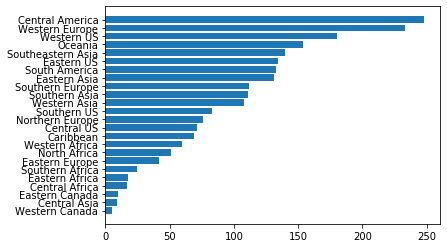

In [40]:
plt.barh(mdfregion['Region_y'], mdfregion['Order.ID'])

### Problem 3.4

In [41]:
mdf.columns

Index(['Row.ID', 'Order.ID', 'Order.Date', 'Ship.Date', 'Ship.Mode',
       'Customer.ID', 'Customer.Name', 'Segment', 'Postal.Code', 'City',
       'State', 'Country', 'Region_x', 'Market', 'Product.ID', 'Category',
       'Sub.Category', 'Product.Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping.Cost', 'Order.Priority', 'Year', 'Month',
       'Returned', 'Order ID', 'Region_y'],
      dtype='object')

In [42]:
dfcat= mdf.groupby('Sub.Category', as_index = False).agg('count').sort_values('Order.ID', ascending=True)

<BarContainer object of 17 artists>

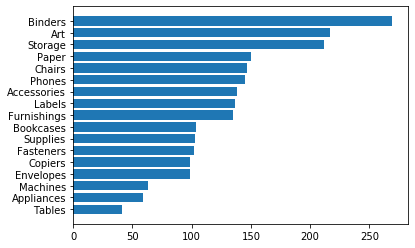

In [43]:
plt.barh(dfcat['Sub.Category'], dfcat['Order.ID'])

## Part II

### Problem 4 - Feature Engineering

In [44]:
# Step 1
full = pd.merge(data_clean, rdata, how='left', left_on = 'Order.ID', right_on = 'Order ID')

In [45]:
full.columns

Index(['Row.ID', 'Order.ID', 'Order.Date', 'Ship.Date', 'Ship.Mode',
       'Customer.ID', 'Customer.Name', 'Segment', 'Postal.Code', 'City',
       'State', 'Country', 'Region_x', 'Market', 'Product.ID', 'Category',
       'Sub.Category', 'Product.Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping.Cost', 'Order.Priority', 'Year', 'Month',
       'Returned', 'Order ID', 'Region_y'],
      dtype='object')

In [46]:
full['Order.Date'].dtypes

dtype('<M8[ns]')

In [47]:
full.Returned = full.Returned.fillna("No")

In [48]:
# Step 2

full['Ship.Date'] = pd.to_datetime(full['Ship.Date'])

In [49]:
full['Process.Time'] = (full['Ship.Date'] - full['Order.Date']).astype(str)

In [50]:
full['Process.Time'] = full['Process.Time'].map(lambda t: int(t[0]))

In [51]:
# Step 3

In [52]:
full_prod = full.loc[full.Returned == "Yes"].groupby("Product.ID",as_index=False).agg('count')[['Product.ID', "Order.ID"]]
full_prod.columns = ['Product.ID', "num_returned"]

In [55]:
full_prod

,Product.ID,num_returned
0,FUR-BO-3176,1
1,FUR-BO-3615,1
2,FUR-BO-3616,1
3,FUR-BO-3621,1
4,FUR-BO-3624,2
...,...,...
1489,TEC-PH-6348,1
1490,TEC-PH-6364,1
1491,TEC-PH-6365,1
1492,TEC-PH-6413,1


In [56]:
full = pd.merge(full, full_prod, how='left', on = "Product.ID")

In [57]:
full.head()

,Row.ID,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Postal.Code,City,...,Profit,Shipping.Cost,Order.Priority,Year,Month,Returned,Order ID,Region_y,Process.Time,num_returned
0,40098,CA-2014-AB10015140-41954,2014-11-11,2014-11-13,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,62.15,40.77,High,2014,11,No,NaN,NaN,2,NaN
1,26341,IN-2014-JR162107-41675,2014-02-05,2014-02-07,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,-288.77,923.63,Critical,2014,2,No,NaN,NaN,2,2.0
2,25330,IN-2014-CR127307-41929,2014-10-17,2014-10-18,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,...,919.97,915.49,Medium,2014,10,No,NaN,NaN,1,2.0
3,13524,ES-2014-KM1637548-41667,2014-01-28,2014-01-30,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,...,-96.54,910.16,Medium,2014,1,No,NaN,NaN,2,NaN
4,47221,SG-2014-RH9495111-41948,2014-11-05,2014-11-06,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,...,311.52,903.04,Critical,2014,11,No,NaN,NaN,1,NaN


In [58]:
pd.set_option('display.max_columns',None)

In [59]:
full.num_returned = full.num_returned.fillna(0)

### Problem 5 - Fitting Models

In [60]:
full.columns

Index(['Row.ID', 'Order.ID', 'Order.Date', 'Ship.Date', 'Ship.Mode',
       'Customer.ID', 'Customer.Name', 'Segment', 'Postal.Code', 'City',
       'State', 'Country', 'Region_x', 'Market', 'Product.ID', 'Category',
       'Sub.Category', 'Product.Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping.Cost', 'Order.Priority', 'Year', 'Month',
       'Returned', 'Order ID', 'Region_y', 'Process.Time', 'num_returned'],
      dtype='object')

In [61]:
# Select columns for machine learning

In [62]:
full_clean = full[['Ship.Mode','Segment', 'Market', 'Category', 'Sub.Category', 
                   'Sales', 'Quantity', 'Discount', 'Profit','Shipping.Cost', 'Order.Priority', 'Month',
                  'Returned','Region_x','Process.Time', 'num_returned' ]]

In [63]:
use_columns = ['Ship.Mode','Segment', 'Market', 'Category', 'Sub.Category', 
                   'Sales', 'Quantity', 'Discount', 'Profit','Shipping.Cost', 'Order.Priority', 'Month',
                  'Returned','Region_x','Process.Time', 'num_returned']

In [64]:
X = pd.get_dummies(full_clean[use_columns].drop('Returned', axis = 1), drop_first=True, dummy_na=True)
y = full_clean['Returned']


In [65]:
y =  y.map(lambda x: 0 if x=="No" else 1)

In [66]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7, stratify = y)

In [67]:
X_train

,Sales,Quantity,Discount,Profit,Shipping.Cost,Month,Process.Time,num_returned,Ship.Mode_Same Day,Ship.Mode_Second Class,Ship.Mode_Standard Class,Ship.Mode_nan,Segment_Corporate,Segment_Home Office,Segment_nan,Market_Asia Pacific,Market_Europe,Market_LATAM,Market_USCA,Market_nan,Category_Office Supplies,Category_Technology,Category_nan,Sub.Category_Appliances,Sub.Category_Art,Sub.Category_Binders,Sub.Category_Bookcases,Sub.Category_Chairs,Sub.Category_Copiers,Sub.Category_Envelopes,Sub.Category_Fasteners,Sub.Category_Furnishings,Sub.Category_Labels,Sub.Category_Machines,Sub.Category_Paper,Sub.Category_Phones,Sub.Category_Storage,Sub.Category_Supplies,Sub.Category_Tables,Sub.Category_nan,Order.Priority_High,Order.Priority_Low,Order.Priority_Medium,Order.Priority_nan,Region_x_Caribbean,Region_x_Central Africa,Region_x_Central America,Region_x_Central Asia,Region_x_Central US,Region_x_Eastern Africa,Region_x_Eastern Asia,Region_x_Eastern Europe,Region_x_Eastern US,Region_x_North Africa,Region_x_Northern Europe,Region_x_Oceania,Region_x_South America,Region_x_Southeastern Asia,Region_x_Southern Africa,Region_x_Southern Asia,Region_x_Southern Europe,Region_x_Southern US,Region_x_Western Africa,Region_x_Western Asia,Region_x_Western Europe,Region_x_Western US,Region_x_nan
32225,73.44,6,0.0,5.04,4.569,6,6,1.0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
27665,37.86,2,0.0,11.34,6.630,8,3,1.0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
10132,683.60,4,0.0,328.08,32.343,12,4,0.0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
638,600.60,13,0.0,131.82,255.570,12,2,0.0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
41344,101.99,2,0.4,-17.00,1.360,12,3,0.0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49805,239.97,3,0.0,71.99,16.950,6,7,2.0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5919,512.19,3,0.0,133.11,57.080,8,4,0.0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
28814,34.95,5,0.0,15.38,5.330,9,1,0.0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
50530,7.14,1,0.0,2.76,1.140,8,4,1.0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [68]:
y.value_counts() / len(y)

0    0.956717
1    0.043283
Name: Returned, dtype: float64

In [69]:
y_train.value_counts() / len(y_train)

0    0.956717
1    0.043283
Name: Returned, dtype: float64

In [70]:
y_test.value_counts() / len(y_test)

0    0.956717
1    0.043283
Name: Returned, dtype: float64

In [71]:
# by default keep the relative frequency
# class sklearn.model_selection.StratifiedKFold(n_splits=5, *, shuffle=True, random_state=7)

In [72]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(class_weight='balanced')
LR.fit(X_train, y_train)
y_predict = LR.predict(X_test)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


### Problem 6 - Model Evaluation 

In [73]:
# Evaluate logistic regression model 
from sklearn.metrics import confusion_matrix, roc_auc_score
confusion_matrix(y_test, y_predict)

array([[6929, 2885],
       [ 145,  299]])

In [74]:
2885 / (2885 + 299)

0.9060929648241206

In [86]:
LR.score(X_test, y_test)

0.7046207837785143

In [76]:
roc_auc_score(y_test, y_predict)

0.6897278111614774

In [85]:
roc_auc_score?

In [78]:
# Cost of falsely predicting as returned but actually not returned (FP)
# Cost of falsely predicting as not returned but actually returned (FN)

# In this case FN should be minimized



### Problem 7 - Feature Engineering Revisit

In [79]:
# Run the model again without the newly created features that include return 